In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import os

In [ ]:
df = pd.read_csv("plus_feature_file_cleaned.csv")

In [ ]:
df['labels'].value_counts(normalize=True)

,proportion
labels,
0,0.565321
1,0.434679


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['text', 'labels', 'category'])
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=100)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:17:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1200x1000 with 0 Axes>

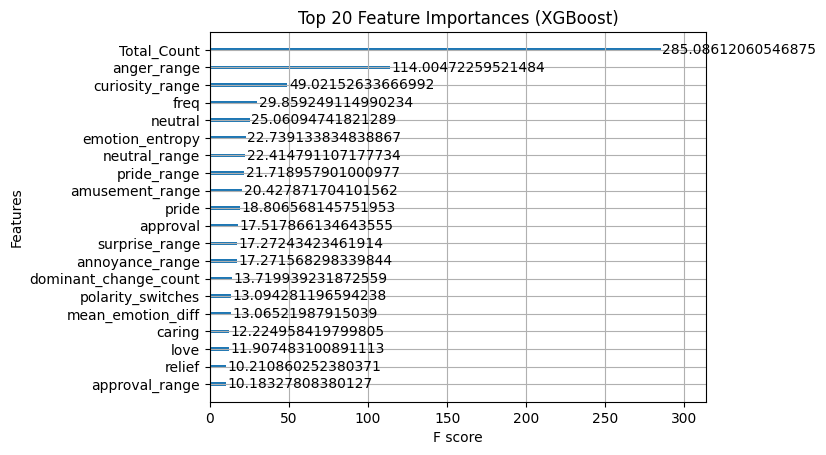

In [ ]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=100)
model.fit(X_train, y_train)

plt.figure(figsize=(12, 10))
plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:19:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


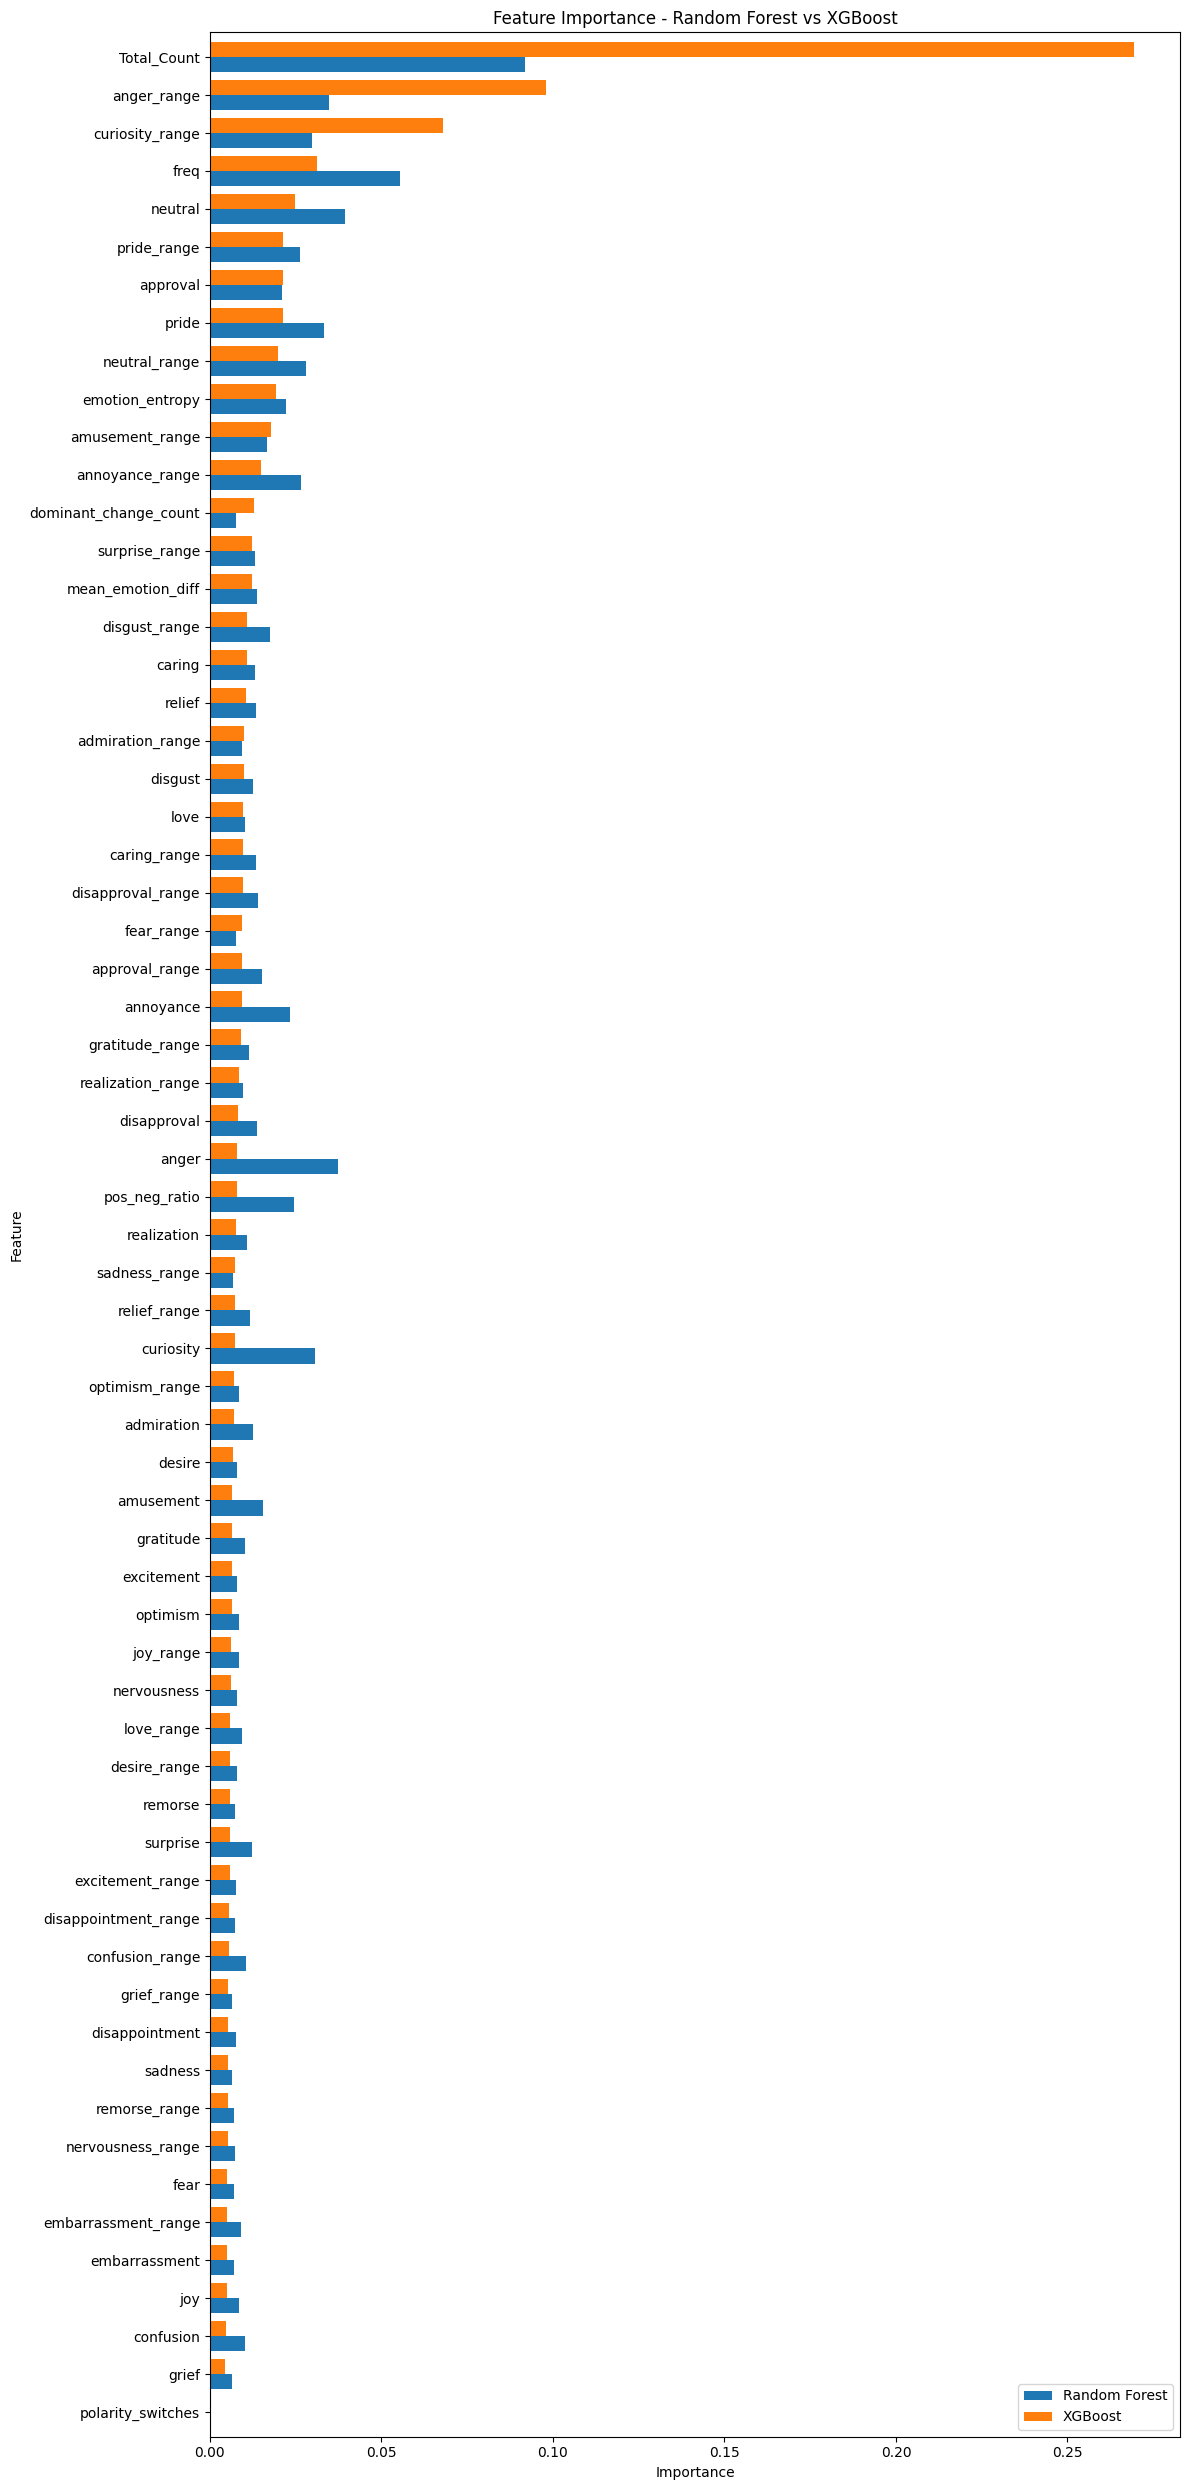

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 데이터 불러오기
df = pd.read_csv("plus_feature_file_cleaned.csv")
X = df.drop(columns=['text', 'labels', 'category'])
y = df['labels']

# 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)
rf_model.fit(X, y)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=100)
xgb_model.fit(X, y)

# 중요도 정리
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest': rf_model.feature_importances_,
    'XGBoost': xgb_model.feature_importances_
}).set_index('Feature')

# 시각화
importance_df.sort_values(by='XGBoost', ascending=True).plot(kind='barh', figsize=(12, 25), width=0.8)
plt.title('Feature Importance - Random Forest vs XGBoost')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

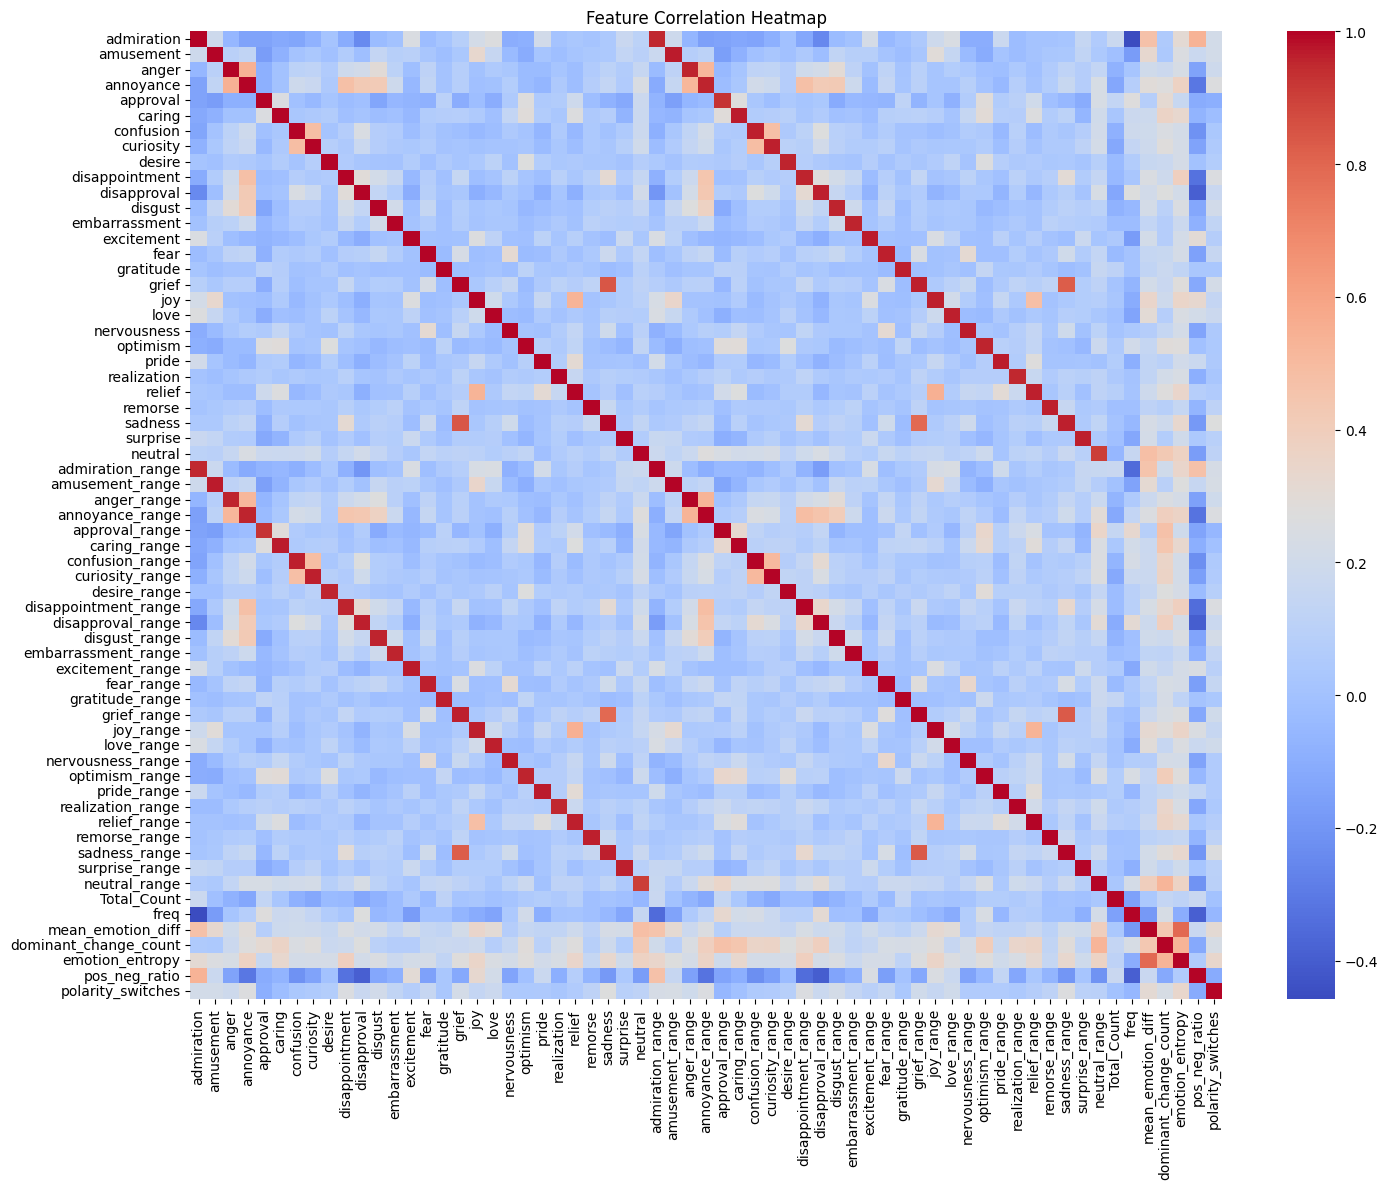

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()